<a href="https://colab.research.google.com/github/Bolorooo24/CV-ML_labs/blob/main/Pytorch-deep-learning/04_pytorch_custom_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch custom datasets notebook

We've used some datasets with pytorch before.
But how do you get your own data into pytorch?

## Domain libraries
Depending on what your're working on, vision,text, audio, recommendation, you'll want to look into each of the pytorch domain libraries for existing data loading function and customizable data loading functions.

**Resources**
* Book version of the course materials for 04 : https://www.learnpytorch.io/04_pytorch_custom_datasets/
* Ground truth version of notebook 4 on github

## 0. Importing Pytorch and setting up the device agnostic code

In [1]:
import torch
from torch import nn

torch.__version__

'2.9.0+cu126'

In [2]:
device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

## 1. Get Data

Our dataset is a subset of the Food101 dataset.

Food101 starts 101 different classes of food and 1000 images per class (750 training, 250 testing).

Our dataset starts with 3 classes of food and only 10% of the images(75 training, 25 testing).

Why? When starting out ML projects, it's imporatant to try things on a small scale and then increase the scale when necessary. The whole point is to speed up how fast you can experiment.



In [3]:
import requests
import zipfile
from pathlib import Path

In [4]:
# setup data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# if the image folder doesn't exist, download it and prepare it
if image_path.is_dir():
  print(f" {image_path} is already exists ... skipping download ")
else:
  print(f" {image_path} doesn't exist ... creating one")
  image_path.mkdir(parents=True, exist_ok=True)

# download the pizza, steak and sushi data
with open(data_path/"pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi.zip")
  print("Downloading the data")
  f.write(request.content)

with zipfile.ZipFile(data_path/ "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping it all")
  zip_ref.extractall(image_path)


 data/pizza_steak_sushi doesn't exist ... creating one
Unzipping it all


## 2. Becoming one with the data (data preparation and data exploration)

In [5]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents"""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dir_path}")


In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi
There are 0 directories and 31 images in data/pizza_steak_sushi
There are 0 directories and 19 images in data/pizza_steak_sushi
There are 0 directories and 25 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi
There are 0 directories and 72 images in data/pizza_steak_sushi
There are 0 directories and 75 images in data/pizza_steak_sushi
There are 0 directories and 78 images in data/pizza_steak_sushi


In [7]:
# setup train and testing paths
train_dir = image_path/ "train"
test_dir = image_path/ "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visualizing and image

1. Get all of the image paths
2. Pick a random image path using python's random.choice()
3. Get the image class name using 'pathlib.Path.parent.stem'
4. Since working with images, let's open the image with python's PIL
5. We'll then show the image and print metadata

In [8]:
import random
from PIL import Image
import glob
# set random seed
# random.seed(42)

# 1. get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)
# 3. get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem # end folder of the dir
print(image_class)

# 4. open image
img = Image.open(random_image_path)

# 5. print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")

data/pizza_steak_sushi/train/steak/2880035.jpg
steak
Random image path: data/pizza_steak_sushi/train/steak/2880035.jpg
Image class: steak
Image height: 512
Image width: 512


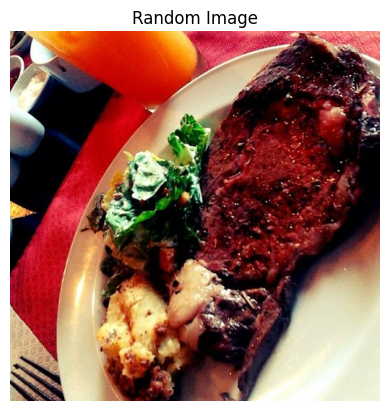

In [9]:
# try to visualize and image with matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

image_data = Image.open(random_image_path)
image_data = plt.np.array(image_data)

plt.imshow(image_data)
plt.axis("off")
plt.title("Random Image")
plt.show()

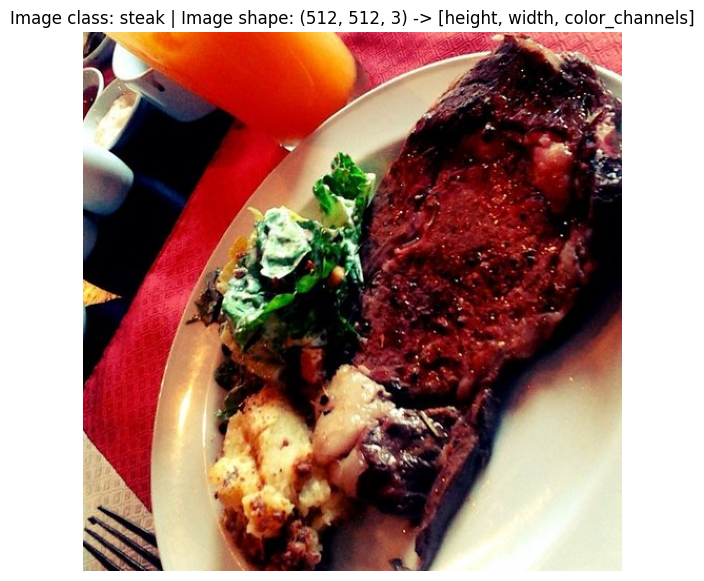

In [10]:
import numpy as np
# turn the image into array
img_as_array = np.asarray(img)

# plot the image with matplotlib
plt.figure(figsize = (10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

array([[[178, 184, 124],
        [166, 167, 107],
        [175, 166, 109],
        ...,
        [255, 175, 162],
        [255, 164, 152],
        [255, 160, 148]],

       [[175, 178, 121],
        [171, 170, 113],
        [177, 168, 111],
        ...,
        [255, 161, 148],
        [244, 146, 133],
        [237, 139, 126]],

       [[180, 180, 126],
        [176, 173, 120],
        [173, 161, 109],
        ...,
        [218, 125, 108],
        [221, 125, 109],
        [223, 127, 111]],

       ...,

       [[192, 184, 145],
        [188, 181, 139],
        [186, 179, 137],
        ...,
        [240, 245, 222],
        [240, 245, 223],
        [239, 244, 222]],

       [[196, 187, 146],
        [190, 181, 140],
        [185, 178, 136],
        ...,
        [238, 243, 220],
        [239, 244, 222],
        [240, 245, 223]],

       [[186, 177, 136],
        [183, 174, 133],
        [184, 177, 133],
        ...,
        [238, 243, 220],
        [239, 244, 222],
        [241, 246, 224]]], dtype=uint8)
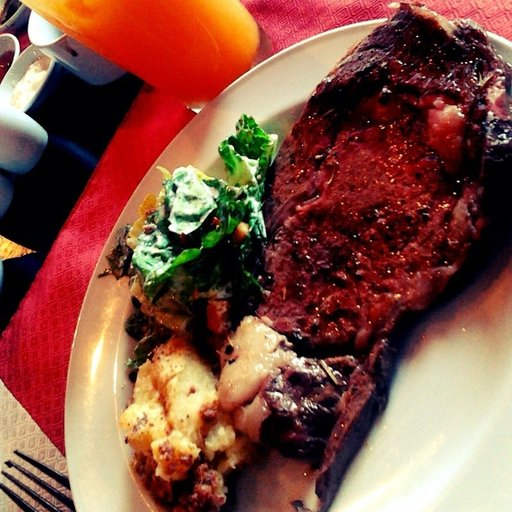

In [11]:
img_as_array

## 3. Transforming data

Before we can use our image data with Pytorch:
1. Turn your target data into tensors (in our case, numerical representation of our images)
2. Turn it into a 'torch.utils.data.Dataset' and subsequently a 'torch.utils.data.DataLoader', we'll call these 'Dataset' and 'DataLoader'.


In [12]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


### 3.1 Transforming data with torchvision.transforms

Transforms help you get your images ready to be used with a model/data augmentation:https://docs.pytorch.org/vision/0.8/transforms.html

Transforms, illustration:
https://docs.pytorch.org/vision/0.13/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py

In [15]:
data_transform = transforms.Compose([
    # resize our image to 64x64
    transforms.Resize(size=(64,64)),
    # flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # turn image into torch.Tensor
    transforms.ToTensor()
])

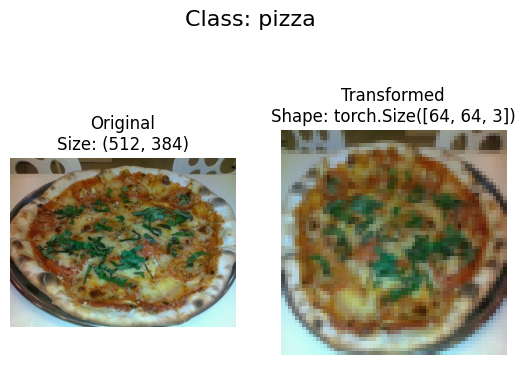

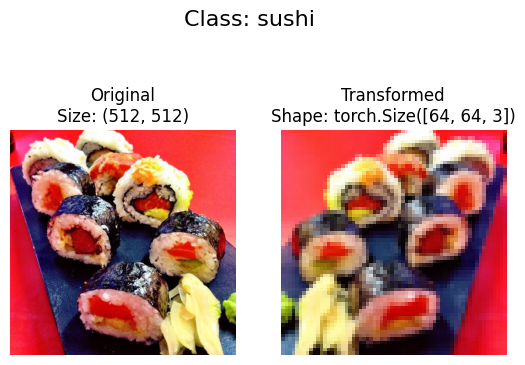

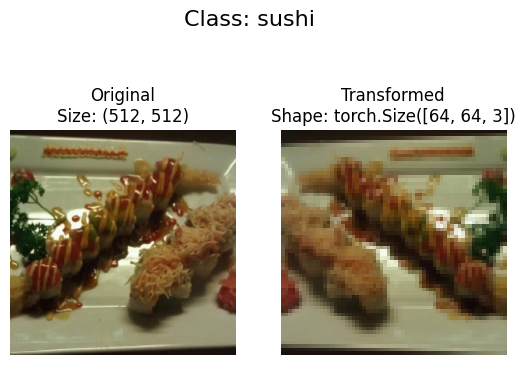

In [17]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
  """
  Select random images from a path of images and loads/transforms them then plots the original vs the transformed version
  """

  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows =1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # transform and plot target image
      transformed_image = transform(f).permute(1,2,0) # (C, H, W) ->(H, W, C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)

 ## 4. Option 1: Loading image data using ImageFolder

 We can load image classification data using torchvision.datasets.ImageFolder - https://docs.pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html

In [18]:
# use imagefolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [19]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [20]:
# get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [21]:
# check the length of our dataset
len(train_data), len(test_data)

(225, 75)

In [22]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [23]:
# index on the train_data dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape:\n {img.shape}")
print(f"Image datatype:\n {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")


Image tensor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute: torch.Size([64, 64, 3]) -> [height, width, color_channel]


Text(0.5, 1.0, 'pizza')

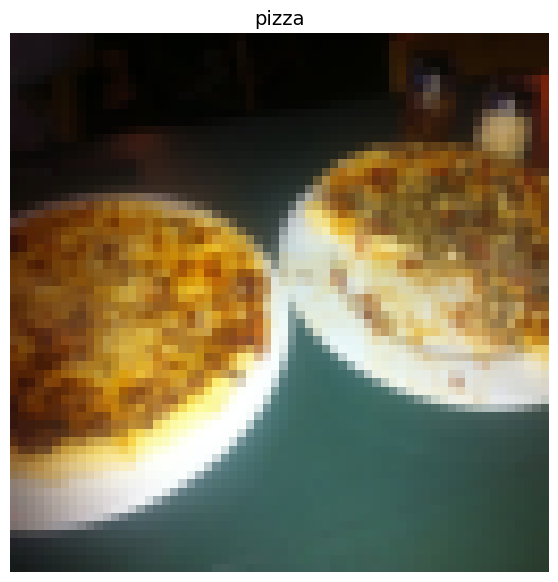

In [24]:
# rearrange the order dimensions /color channel last/
img_permute = img.permute(1,2,0)

# print out different shapes
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute: {img_permute.shape} -> [height, width, color_channel]")

# plot the image
plt.figure(figsize=(7,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

## 4.2 Turn loaded images into 'DataLoader's

A 'DataLoader' is going to help us turn our dataset's into iterables and we can customize the batch_size so our model can see batch_size images at a time.

In [25]:
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    num_workers=os.cpu_count(),
    shuffle=True,
)


test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    num_workers=os.cpu_count(),
    shuffle=False
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f58742ce120>,
 <torch.utils.data.dataloader.DataLoader at 0x7f5873fbdf40>)

In [26]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [27]:
img, label = next(iter(train_dataloader))

# batch size will now be 1, you can change the batch size if you like
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")


Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


## 5 Option  2: Loading image data with a custom dataset

1. Want to be able to load image from file
2. Want to be able to get class names from the Dataset
3. Want to be able to get classes as dictionary from the Dataset

Pros:
* Can create a 'dataset' out of almost anything
* Not limited to Pytorch pre-built 'dataset' FunctionSchema


Cons:
* Even though you could create 'dataset' out of almost anything, it doesn't mean it will work...
* Using a custom 'dataset' often results in us writing more code, which could be prone to errors or performance issues.

All custom datasets in Pytorch, often subclass - https://docs.pytorch.org/vision/main/datasets.html

In [28]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [29]:
# instance fo torchvision.dataset.imagefolder()

train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 creating a helperfucntion to get class names

We want a fucntion to:

1. Get the class names using os.scandir() to tranverse a target directory (ideally the directory is in standard image classification format).format
2. Raise an error if the class names aren't found (if this happens, there might be something wrong with the directory structure)
3. Turn the class names into a dict and a list and return them

In [30]:
train_dir

PosixPath('data/pizza_steak_sushi/train')

In [31]:
# setup path fro target directory

target_directory = train_dir
print(f"Target dir: {target_directory}")

# get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [32]:
 list(os.scandir(target_directory))

[<DirEntry 'sushi'>, <DirEntry 'steak'>, <DirEntry 'pizza'>]

In [33]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """
  Finds the class folder names in a target directory
  """
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in{directory}... please check file structure.")

  # 3. create a dictionary of index labels (computers prefer numbers rather than strings as labels)
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}


  return classes, class_to_idx

In [34]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

 ### 5.2 Create a custom 'Dataset' to replicate 'ImageFolder'

 To create our own custom dataset, we want to:

 1. Subclass 'torch.utils.data.Dataset'
 2. Init our subclass with a target dir (the directory we'd like to get data from) as well as a transform if we'd like to transform our data.
                                         
 3. Create several attributes:
  * paths - paths of our images
  * transform - the tranform we'd like to use
  * classes - a list of the target classes
  * class_to_idx - a dict of the target classes mapped to integer labels
 4. Create a function to load_images(), this function will opena n image
 5. Overwrite the __len()__ method to return the lenght of our dataset
 6. Overwrite the __getitem()__ method to return a given sample when passed an index
                                          

In [35]:
# write a custom dataset class
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  # 2. Initialize our custom dataset
  def __init__(self,
               targ_dir: str,
               transform=None):
    # 3. create class attributes
    # get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    # setup transform
    self.transform = transform
    # create classes and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # 4. create a function to load images
  def load_image(self, index: int) -> Image.Image:
    "Opens an image via a path and returns it."
    image_path = self.paths[index]
    return Image.open(image_path)

  # 5. overwrite __len__()
  def __len__(self) -> int:
    "Returns the total number of samples"
    return len(self.paths)

  # 6. Overwrite __getitem__() method to return a particular sample
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    """Returns one sample of data, data and label (X,y)"""
    img = self.load_image(index)
    class_name = self.paths[index].parent.name # expects tapth in format: data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    # transform if necessary
    if self.transform:
      return self.transform(img), class_idx # return data, label

    else:
      return img, class_idx







In [36]:
# create a transorm

from torchvision import transforms
train_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [37]:
# test out imagefoldercustom
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)
train_data_custom, test_data_custom


(<__main__.ImageFolderCustom at 0x7f5873d70800>,
 <__main__.ImageFolderCustom at 0x7f5873eefce0>)

In [38]:
len(train_data), len(train_data_custom)

(225, 225)

In [39]:
len(test_data), len(test_data_custom)

(75, 75)

In [40]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [41]:
 train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [42]:
# check for equality between original ImageFolder Dataset and ImageFolderCustomDataset
print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==train_data.classes)

True
True


### 5.3 Create a function to display random images

1. Take in a dataset and a number of other parameters such as class names and how many image to visualize
2. To prevent the display getting out of hand, let's cap the number of images to see at 10 .
3. Set the random seed for reproducibility
4. Get a list of random sample imdexes from the target dataset.
5. Setup a matplolib plot.
6. Loop through the random sample iamges and plot them with maplolib.
7. Make sure the dimentions of our images line up with matplotlib (HWC)

In [43]:
# 1. create a funciton to take in a dataset

def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  # 2. adjust display if n is too high
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display, purposes, n shouldn't be larger than 10, setting to 10 and removing shape display")
  # 3. set the seed
  if seed:
    random.seed(seed)

  # 4. get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  # 5. setup plot
  plt.figure(figsize=(16, 8))

  # 6. loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1,2,0) # [color_channels, height, width] -> [height, width, color_channels]

    # plot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)


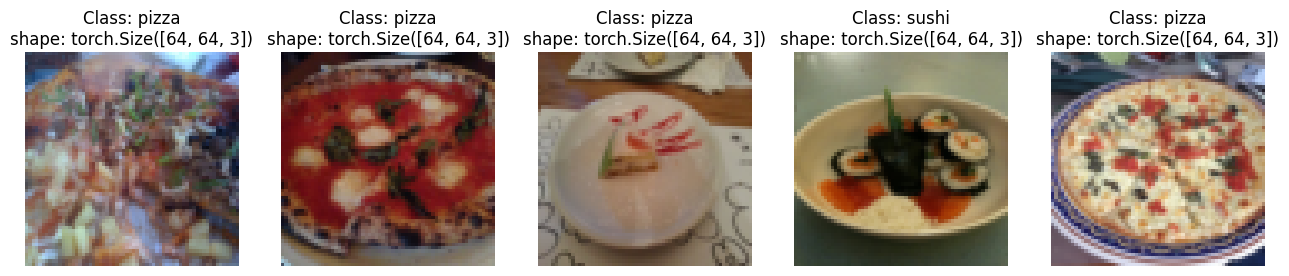

In [44]:
# display random images from the imagefolder created dataset
display_random_images(
    dataset=train_data,
    n=5,
    classes=class_names,
    seed=None
);

For display, purposes, n shouldn't be larger than 10, setting to 10 and removing shape display


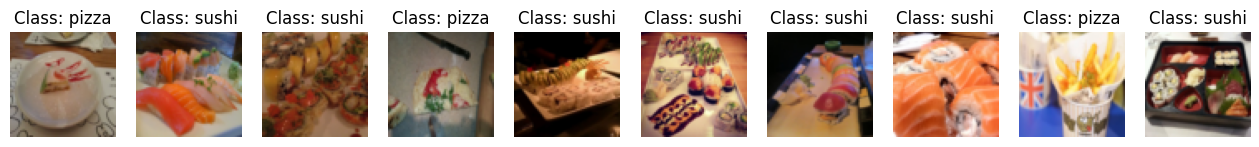

In [45]:
# display random images form the imagefoldercustom dataset

display_random_images(
    train_data_custom,
    n=20,
    classes=class_names,
    seed=42
)

### 5.4 Turn custom loaded images into dataloaders



In [46]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(
    dataset=train_data_custom,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=True
)

test_dataloader_custom = DataLoader(
    dataset=test_data_custom,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=False
)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7f5873d7c740>,
 <torch.utils.data.dataloader.DataLoader at 0x7f5873c4e480>)

In [47]:
# get image and label from custom dataloader

img_custom, label_custom = next(iter(train_dataloader_custom))

# print out the shapes
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

## 6. Other forms of transforms data augmentation

Data augmentation is the process of arificially adding diversity to your training data


In the case fo image data, this may mean applying various image tranformations to the training images.

This practice hepfully resutls in a mdoel that's more generalizable to unseen data.

Let's take a look at on particular type of data augmentation used to train pytroch vision models to state of the art levels...


Blog post : https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/

In [48]:
# Let's look at trivialaugment() - https://docs.pytorch.org/vision/0.21/auto_examples/transforms/plot_transforms_illustrations.html#sphx-glr-auto-examples-transforms-plot-transforms-illustrations-py

from torchvision import transforms

train_transform  = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transorm = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])



In [49]:
# get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/sushi/2741434.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1172255.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/858157.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/3196729.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/3177743.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2190404.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1230335.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2276986.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/46797.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/207578.jpg')]

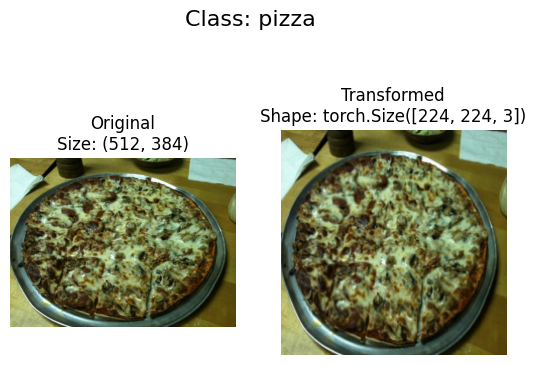

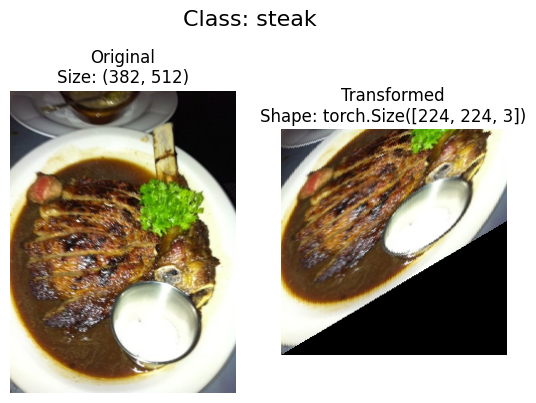

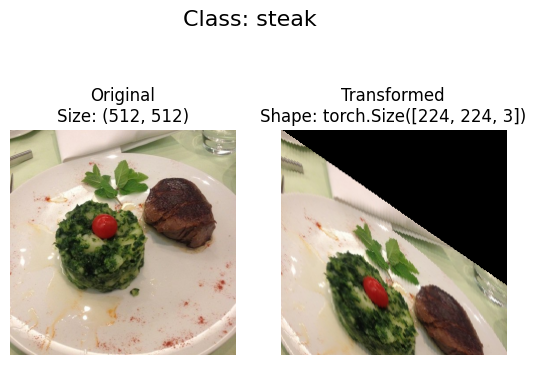

In [50]:
# plot random transformed images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=3,
    seed=None
)

## 7. Model 0: TinyVGG without data augmentation


Let's replicate TinyVGG architecture from the CNN explainer website: https://poloclub.github.io/cnn-explainer/


### 7.1 Creating transforms and loading data for Model 0


In [51]:
# create simple transform

simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [52]:
# 1. Load and tranform data

from torch.utils.data import DataLoader
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root=train_dir,
                               transform=simple_transform
                               )
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)
# 2. turn the datasets into DataLoaders
import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# create dataloader
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)


### 7.2 Create TinyVGG model class


In [53]:
class TinyVGG(nn.Module):
  """Model architecure copying TinyVGG from CNN Explainer: https://poloclub.github.io/cnn-explainer/"""
  def __init__(self, input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride is same as kernel_size
    )
    self.conv_block2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride is same as kernel_size
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )
  def forward(self,x):
    x = self.conv_block1(x)
    # print(f"Block 1: {x.shape}")
    x = self.conv_block2(x)
    # print(f"Block 2: {x.shape}")
    x = self.classifier(x)
    # print(f"Classifier shape: {x.shape}")
    return x
    # return self.classifier(self.conv_block1(self.conv_block2(x))) : https://horace.io/brrr_intro.html


In [54]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10 ,
                  output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### 7.3 Try a forward pass on a single image (to test the mdoel)


In [55]:
# get a single image batch
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [56]:
# try a forward pass
model_0(image_batch.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4669e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9129e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6417e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7980e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1815e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3994e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.2317e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

### 7.4 Use `torchinfo` to get an idea of the shapes going through our model

In [57]:
# install torchinfo, import if it's available
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

In [58]:
from torchinfo import summary

summary(model_0, input_size=(BATCH_SIZE, 3, 64, 64))


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 30, 30]          --
│    └─Conv2d: 2-1                       [32, 10, 62, 62]          280
│    └─ReLU: 2-2                         [32, 10, 62, 62]          --
│    └─Conv2d: 2-3                       [32, 10, 60, 60]          910
│    └─ReLU: 2-4                         [32, 10, 60, 60]          --
│    └─MaxPool2d: 2-5                    [32, 10, 30, 30]          --
├─Sequential: 1-2                        [32, 10, 13, 13]          --
│    └─Conv2d: 2-6                       [32, 10, 28, 28]          910
│    └─ReLU: 2-7                         [32, 10, 28, 28]          --
│    └─Conv2d: 2-8                       [32, 10, 26, 26]          910
│    └─ReLU: 2-9                         [32, 10, 26, 26]          --
│    └─MaxPool2d: 2-10                   [32, 10, 13, 13]          --
├─Sequentia

## 7.5 Create train and test loops functions

* `train_step()`- takes in a model and dataloader and trains the model on the dataloader
* `test_step()` - takes in amodel and dataloader and evaluates the model on the dataloader

In [59]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
  # put the model in train mode
  model.train()

  # setup train loss and train acc values
  train_loss, train_acc = 0,0

  # loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
    # send data to the target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimzer step
    optimizer.step()

    # calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  # adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss/len(dataloader)
  train_acc = train_acc/len(dataloader)
  return train_loss, train_acc


In [60]:
# create a test step
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  # put model in eval mode
  model.eval()

  # setup test loss and test acc values
  test_loss, test_acc = 0,0

  # turn on inference mode
  with torch.inference_mode():
    # loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # sent data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss/len(dataloader)
    test_acc = test_acc/len(dataloader)
    return test_loss, test_acc

In [61]:
import requests
from pathlib import Path

# download the helper function from Learn pytorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [62]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device=None):
  """Prints difference between start and end time"""

  total_time = end - start
  print(f"Total time on {device}: {total_time:.3f} seconds")
  return total_time


### 7.6 Creating a `train()` function to combine `train_step()` and `test_step()`

In [63]:
from tqdm.auto import tqdm

# 1. creaet a train function that takes in various model parameters + optimizer + dataloader +

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int=5,
          device=device):
  # 2. Create empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}
  # 3. loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)
    # 4. print out what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:2f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.2f}")

    # 5. update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # 6. return the filled results at the end of the epochs
  return results



### 7.7 Train and evaluate our model 0


In [64]:
# set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set number of epochs
EPOCHS = 100

# recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)


# setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr=0.001)

# start the timer
from timeit import default_timer as timer
start_time = timer()

# train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=EPOCHS)
#end the timer and print out how long it was
end_time = timer()
print_train_time(start=start_time,
                 end=end_time,
                 device=device)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1063 | Train acc: 0.304688 | Test loss: 1.0983 | Test acc: 0.30
Epoch: 1 | Train loss: 1.0998 | Train acc: 0.328125 | Test loss: 1.0697 | Test acc: 0.54
Epoch: 2 | Train loss: 1.0869 | Train acc: 0.488281 | Test loss: 1.0808 | Test acc: 0.49
Epoch: 3 | Train loss: 1.0846 | Train acc: 0.402344 | Test loss: 1.0605 | Test acc: 0.58
Epoch: 4 | Train loss: 1.0661 | Train acc: 0.421875 | Test loss: 1.0655 | Test acc: 0.56
Epoch: 5 | Train loss: 1.0299 | Train acc: 0.441406 | Test loss: 1.0136 | Test acc: 0.53
Epoch: 6 | Train loss: 0.9803 | Train acc: 0.417969 | Test loss: 0.9310 | Test acc: 0.61
Epoch: 7 | Train loss: 0.9510 | Train acc: 0.585938 | Test loss: 1.0168 | Test acc: 0.48
Epoch: 8 | Train loss: 0.9261 | Train acc: 0.597656 | Test loss: 1.0666 | Test acc: 0.34
Epoch: 9 | Train loss: 1.0033 | Train acc: 0.457031 | Test loss: 1.0564 | Test acc: 0.40
Epoch: 10 | Train loss: 0.8824 | Train acc: 0.519531 | Test loss: 0.9723 | Test acc: 0.48
Epoch: 11 | Train lo

94.01779912199981

### 7.8 Plot the loss curves of Model 0
A **loss curve** is a way of tracking your mdoel's progress over time


In [65]:
# get the model_0 results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [66]:
def plot_loss_curves(results: Dict[str, List[float]]):
  """Plots training curves of a results dictionary"""
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]
  # figure our how many epochs there were
  epochs = range(len(results["train_loss"]))

  # setup a plot
  plt.figure(figsize=(15,7))

  # plot the loss
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label = "test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # plot the accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy" )
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

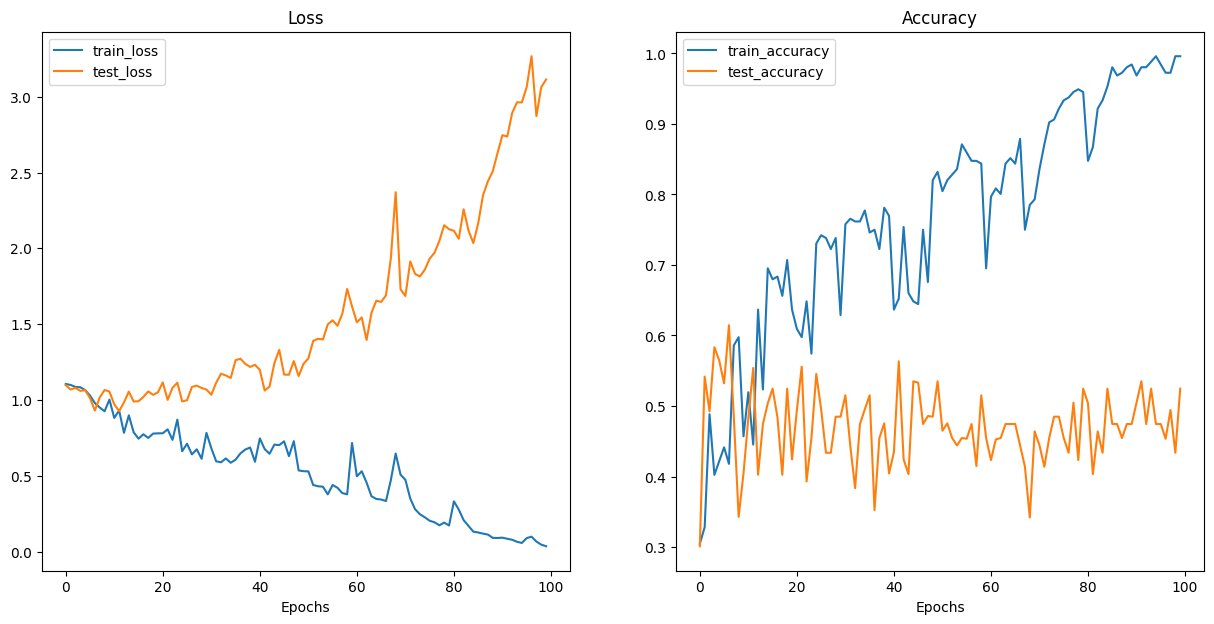

In [67]:
plot_loss_curves(model_0_results)

## 8. What should an ideal loss curve look like?

https://developers.google.com/machine-learning/crash-course/overfitting/interpreting-loss-curves
A loss curve is one of the most helpful ways to troubleshoot a model.

## 9. Model 1. Data augmentation for TinyVGG

Now let's try another modelling experiment this time using the same model as before with some data augmentation


### 9.1 Create transform with data augmentation
Create transform with data augmentation




In [68]:
# create training transform with TrivialAugment
from torchvision import transforms

train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()

])

test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

### 9.2 Create train and test Dataset's and DataLoader's with data augmentation

In [69]:
# turn image folders into datasets
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transform_simple)


In [70]:
 # turn our datasets into dataloaders
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)


### 9.3 Construct and train mdoel 1
This time wi'll be using the same model architecure excep this time we've augmented the training data

In [71]:
# create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

Now we've got  a model and dataloaders, let's create a loss functin and an optimizer and call upon our train() function to train and evaluate our model.

In [75]:
# set  random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# seth the number of epochs
NUM_EPOCHS = 100

# setup loss functions
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

# start the timer
from timeit import default_timer as timer
start_time = timer()

# train model_1
model_1_resutls = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs = NUM_EPOCHS,
                        device=device)
# end the timer and print out how long it took
end_time = timer()
print(f"Total training time for model_1: {end_time-start_time:.3f} seconds")


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.0835 | Train acc: 0.445312 | Test loss: 1.0952 | Test acc: 0.27
Epoch: 1 | Train loss: 1.0673 | Train acc: 0.433594 | Test loss: 1.1081 | Test acc: 0.27
Epoch: 2 | Train loss: 1.0229 | Train acc: 0.433594 | Test loss: 1.1279 | Test acc: 0.27
Epoch: 3 | Train loss: 1.0740 | Train acc: 0.339844 | Test loss: 1.1229 | Test acc: 0.31
Epoch: 4 | Train loss: 1.0388 | Train acc: 0.531250 | Test loss: 1.1267 | Test acc: 0.29
Epoch: 5 | Train loss: 1.0389 | Train acc: 0.406250 | Test loss: 1.1389 | Test acc: 0.30
Epoch: 6 | Train loss: 0.9666 | Train acc: 0.570312 | Test loss: 1.0506 | Test acc: 0.27
Epoch: 7 | Train loss: 1.0370 | Train acc: 0.421875 | Test loss: 1.0257 | Test acc: 0.31
Epoch: 8 | Train loss: 1.0249 | Train acc: 0.433594 | Test loss: 1.0639 | Test acc: 0.37
Epoch: 9 | Train loss: 0.9541 | Train acc: 0.566406 | Test loss: 0.9396 | Test acc: 0.51
Epoch: 10 | Train loss: 0.9551 | Train acc: 0.562500 | Test loss: 0.9608 | Test acc: 0.38
Epoch: 11 | Train lo

### 9.4 Plot the loss curves of model 1
A loss curve helps you evaluate your models performance

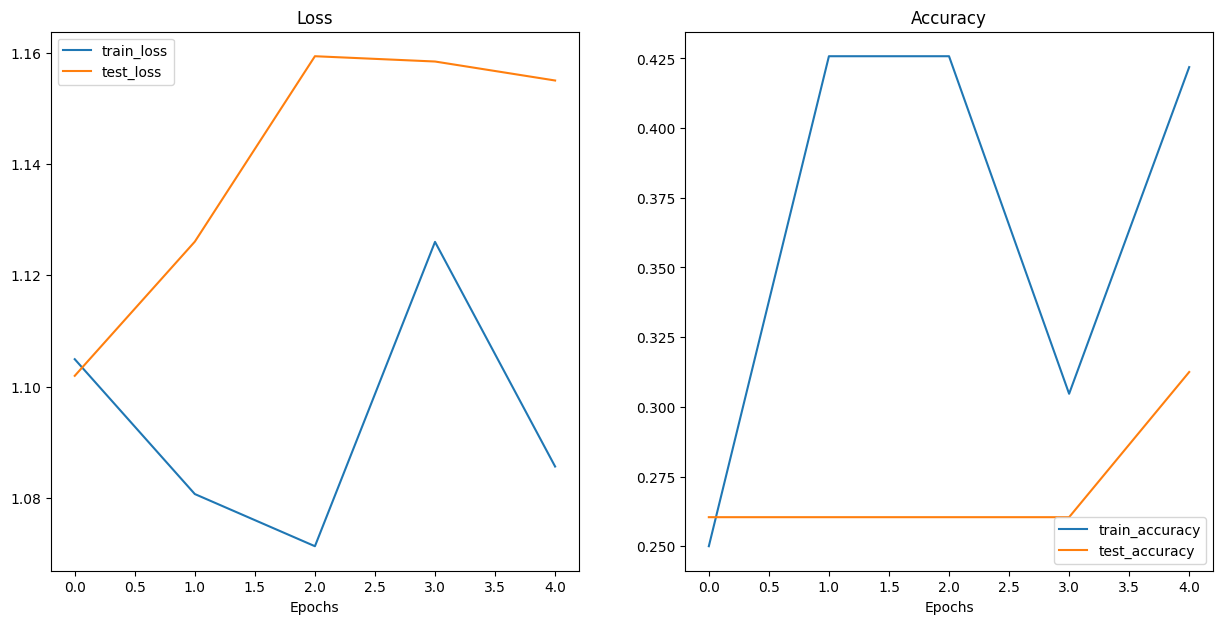

In [74]:
plot_loss_curves(model_1_resutls)

## 10. Compare model results

After evaluating our modelling experiments on their own, it's important to compare them to each other.

There's a few different ways to do this:
1. Hard coding
2. Pythorch + tensorboard -https://docs.pytorch.org/docs/stable/tensorboard.html
3. Weights & biasas - https://wandb.ai/site/
4. Mlflow - https://mlflow.org/


In [76]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_resutls)
model_0_df

train_loss  train_acc  test_loss  test_acc
0     1.106320   0.304688   1.098320  0.301136
1     1.099802   0.328125   1.069678  0.541667
2     1.086876   0.488281   1.080838  0.492424
3     1.084554   0.402344   1.060544  0.583333
4     1.066114   0.421875   1.065539  0.564394
..         ...        ...        ...       ...
95    0.090403   0.984375   3.064195  0.474432
96    0.099797   0.972656   3.266508  0.453598
97    0.067491   0.972656   2.871635  0.494318
98    0.047193   0.996094   3.062616  0.433712
99    0.036861   0.996094   3.113460  0.524621

[100 rows x 4 columns]

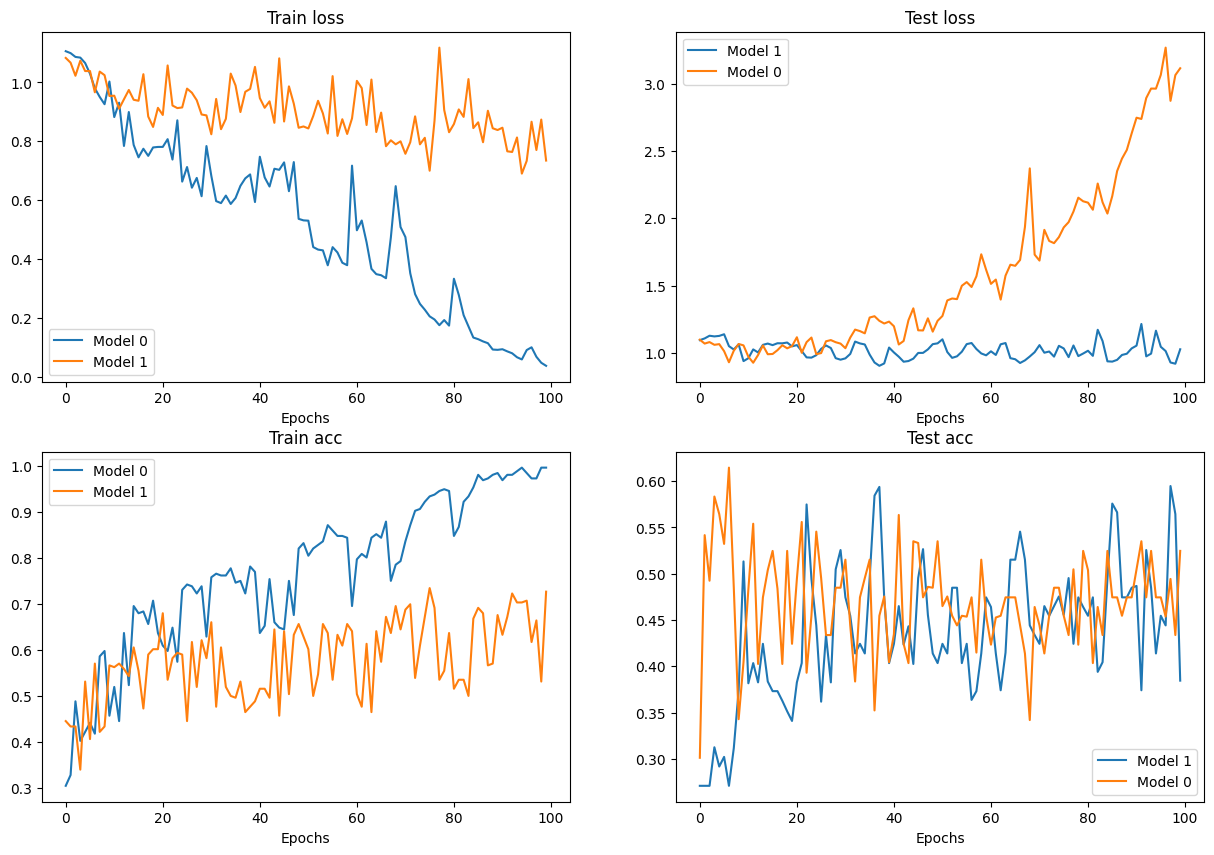

In [79]:
# setup a plot

plt.figure(figsize=(15,10))

# get number of epochs
epochs = range(len(model_0_df))

# plot train loss
plt.subplot(2,2,1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train loss")
plt.xlabel("Epochs")
plt.legend();

# plot test loss
plt.subplot(2,2,2)
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.title("Test loss")
plt.xlabel("Epochs")
plt.legend();

# plot train acc
plt.subplot(2,2,3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train acc")
plt.xlabel("Epochs")
plt.legend();

# plot test loss
plt.subplot(2,2,4)
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.title("Test acc")
plt.xlabel("Epochs")
plt.legend();

## 11. Making a prediction on a custom image

Although we've trained a model on custom data .. how do you make a prediction on a sample/image that's not in either trainig or testing dataset.

In [80]:
# download custom image
import requests

# setup custom image path

custom_image_path = data_path / "04-pizza-dad.jpeg"

# download the imag if it doesn't already exist
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    # when downloading from github, need to use the "raw" file link
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/images/04-pizza-dad.jpeg")
    print(f"Downloading {custom_image_path}...")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exists, skipping downloading")

### 11.1 Loading in a custom image with pytorch

We have to make sure our custom image is in the same format as the data our model was trianed on.

* In tensor form with datatype(torch.float32)
* of shape 64x64x3
* on the right device

Read more - https://docs.pytorch.org/vision/0.11/io.html


In [83]:
custom_image_path


PosixPath('data/04-pizza-dad.jpeg')

In [86]:
import torchvision

# read in custom image
custom_image_uint8 = torchvision.io.read_image(custom_image_path)
print(f"Custom image tensor: \n {custom_image_uint8}")
print(f"Custom image shape: {custom_image_uint8.shape}")
print(f"Custom image shape: {custom_image_uint8.dtype}")

Custom image tensor: 
 tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)
Custom image shape: torch.Size([3, 4032, 3024])
Custom image sha

### 11.2 Making a predction on a custom image iwth a trianed Pytorch model

In [91]:
# load in the custom image and covert to torch.float32

custom_image =torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255
custom_image

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

In [92]:
custom_image.shape

torch.Size([3, 4032, 3024])

In [96]:
# create a transform pipeline to resize image\
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64, 64))
])

# transform target image
custom_image_transformed = custom_image_transform(custom_image)

print(f"Original shape: {custom_image.shape}")
print(f"Transformed shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
Transformed shape: torch.Size([3, 64, 64])


In [98]:
# This will error no batch size
model_1.eval()

with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x169 and 1690x3)

In [100]:
# add batch size dimension
custom_image_transformed.shape, custom_image_transformed.unsqueeze(0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [104]:
# This will error no batch size
model_1.eval()

with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))

custom_image_pred

tensor([[ 0.9674, -2.0274, -0.5067]], device='cuda:0')

In [105]:
class_names

['pizza', 'steak', 'sushi']

`Note, to make a prediction on a custom image we had to:
`
* Load the image and turn it into a tensor
* Make sure the image was the same datatype as the model (torch.float32)
* Make sure the image was the same shape as the data the model was trianed on (3, 64,64) with a batch size (1,3,64,64)
* Make sure the image was on the same device as our model

In [106]:
# convert raw output logits -> prediction probabilities
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_probs

tensor([[0.7818, 0.0391, 0.1790]], device='cuda:0')

In [107]:
# convert prediction probs -> prediction labels
custom_image_pred_labels = torch.argmax(custom_image_pred_probs, dim=1)
custom_image_pred_labels

tensor([0], device='cuda:0')

In [109]:
class_names[custom_image_pred_labels]

'pizza'

### 11.3 Putting custom image prediction together: building a function
Ideal outcome:

A function where we pass an image path to and our mdoel predict on that image and plot the image + prediction


In [124]:
# custom image prediction function

def predict_custom_image(image_path: str,
                         model: torch.nn.Module,
                         transform=None,
                         class_names: List[str] = None,
                         device=device):
  """Makes a prediction on a target image with a trained model and plots the image and predictions."""
  # load the image
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

  # divide the image pizel values by 255 to get them between [0,1]
  target_image = target_image/255

  # transform if necessary
  if transform:
    target_image = transform(target_image)

  # make sure the model i son the target device
  model.to(device)

  # turn on eval and make prediction

  model.eval()

  with torch.inference_mode():
    # add an extra dimension to the image
    target_image = target_image.unsqueeze(0)

    # make a prediction on the image with the extra batch dimension
    target_image_pred = model(target_image.to(device))


  # convert raw output logits -> prediction probabilities
  target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
  # convert prediction probs -> prediction labels
  target_image_pred_labels = torch.argmax(target_image_pred_probs, dim=1)

  # plot the image alongside the prediction and prediction prob
  target_class_name = class_names[target_image_pred_labels]


  plt.imshow(target_image.squeeze(0).permute(1,2,0))
  if class_names:
    title = f"Pred: {class_names[target_image_pred_labels.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  else:
    title = f"Pred: {target_image_pred_labels} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  plt.title(title)
  plt.axis(False)






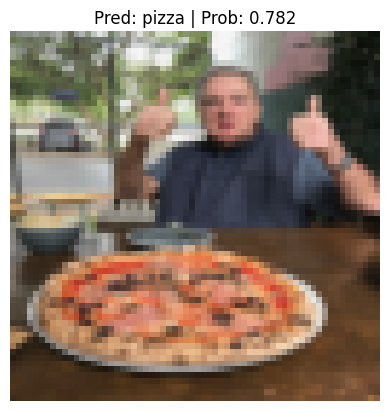

In [127]:
# pred on our custom image
predict_custom_image(model=model_1,
                     image_path = custom_image_path,
                     class_names = class_names,
                     transform = custom_image_transform,
                     device = device)